In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests

In [2]:
API_Call=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=INTL.57-1-RUS-TBPD.M"
Series_Name_Russia= "Crude oil including lease condensate production, Russia, Monthly"
Series_ID_Russia_Crude= "INTL.57-1-RUS-TBPD.M"
api_key = EIA_key
api = eia.API(api_key)
#this is the start and end date for matplotlib
series_search = api.data_by_series(series=Series_ID_Russia_Crude)
russ_crude_df = pd.DataFrame(series_search)

In [3]:
def retrieve_time_series(api, Series_ID_Russia_Crude):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=Series_ID_Russia_Crude)
    ##Create a pandas dataframe from the retrieved time series
    global russ_crude_df
    russ_crude_df = pd.DataFrame(series_search)
    return russ_crude_df
# define another function main to run the script through
def main():
    """
    Run main script
    """
    #Create EIA API using your specific API key
    api_key = EIA_key
    api = eia.API(api_key)
#     #Declare desired series ID
#     Series_ID="PET.WGTSTUS1.W"
    russ_crude_df=retrieve_time_series(api, Series_ID_Russia_Crude)
    #Print the returned dataframe df
    print(df)
req = requests.get(API_Call, verify = False)

#Clean the dataframe by resetting the index because the date is automatically set as the index
russ_crude_df.reset_index(inplace=True)
russ_crude_df.rename(columns={'Crude oil including lease condensate production, Russia, Monthly (thousand barrels per day)':'Russian Crude'}, inplace=True)
russ_crude_df.rename(columns={'index':'Date'}, inplace=True)

#the days were repeated so we need to drop the last two days
test=russ_crude_df['Date']
length = len(test)          # for reading and writing sakes, len(A): lenght of A
newtest = [None] * length          # newtest = [none, none, none], go look up empty array creation
strLen = 0 

# for i in range(0, length):             # for loop
#     str = test[i]                      # get n th element of test
#     strLen = len(str)                  # for reading sake, the lenght of string that will be spliced
#     russ_crude_df['Date'][i] = str[0:strLen - 3] # n th element of newtest is the spliced n th element from test

#the rest of the dates was in a weird format so we have to get them into %Y%m%d format and then convert to datetime
def format_date(row_value):
    #split string on space and slice out the first two parts
    year=row_value.split(" ")[0]
    month=row_value.split(" ")[1]#[:2]
#     day = row_value.split(" ")[1][2:]
    return f"{year}{month}"
russ_crude_df['Date']=russ_crude_df['Date'].map(format_date)
russ_crude_df['Date']=pd.to_datetime(russ_crude_df['Date'].astype(int), format='%Y%m')
#data is in the form YYYYMM with no date
#also there is no data from 1973 to 1992 so this comes up as an error
russ_crude_df=russ_crude_df[(russ_crude_df['Date']>"1991-12-01")]


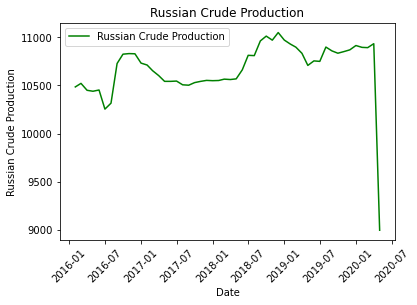

In [6]:
start_date = "2016-01-01"
end_date =  datetime.datetime.now()
russ_date_crude_df=russ_crude_df[(russ_crude_df['Date']>start_date)& (russ_crude_df['Date']< end_date)]

# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Russian Crude Production')
ax1.plot(russ_date_crude_df['Date'],russ_date_crude_df['Russian Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Russian Crude Production")

# defining legend style and data
blue_line = mlines.Line2D([], [], color='g', label='Russian Crude Production')
plt.legend(handles=[blue_line])
plt.savefig("RussianCrudeAPI.png", bbox_inches='tight')